### What is Artificial Neural Network

- An artificial neural network (ANN) is a computational model that is inspired by the structure and function of biological neural networks, such as the human brain. It is composed of a large number of interconnected processing nodes, called neurons, which are organized into layers.

- Each neuron in the network receives input from other neurons in the previous layer, processes the information, and then passes the output to the next layer of neurons. The output of the final layer is the network's prediction or decision based on the input data.

- ANNs are typically used for tasks such as classification, regression, and pattern recognition. They are capable of learning from data by adjusting the strength of the connections between neurons, a process called training or learning. This allows ANNs to improve their performance on a specific task as they receive more training data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5175,7813-TKCVO,Female,0,Yes,No,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.35,393.15,No
5522,2619-WFQWU,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.15,70.15,Yes
705,7133-VBDCG,Female,0,No,No,25,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.85,2015.35,Yes
1038,4869-EPIUS,Male,0,Yes,No,56,Yes,No,Fiber optic,No,...,No,No,No,Yes,One year,Yes,Electronic check,80.90,4557.5,No
2926,0106-UGRDO,Female,0,Yes,No,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.00,8182.85,No


### Data Preprocessing

In [3]:
#we don't need customerId so, we will drop this column
df.drop('customerID',axis='columns',inplace=True)
#it will show all the columns with the dtype
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#here we can see that total charges are object 
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
#pd.to_numeric(df.TotalCharges)
#it showed me error because there are string which includes " " (spaces) betweem them
#it showed error coerce

In [6]:
#so we will see the row that are  having spaces
pd.to_numeric(df.TotalCharges,errors='coerce')
#so it above line will change totalcharges to numeric and wherever space will there it will just print no

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
#it will showing the data that totalcharges column will null
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#so there are 20 columns in which Totalchargges are null
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [9]:
df.iloc[488]['TotalCharges']

' '

In [10]:
#so, we will drop the this 11 rows
df1=df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\ronak\AppData\Local\Temp\ipykernel_4312\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [13]:
df1.dtypes
#now you can see in output that TotalCharges are in float64

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

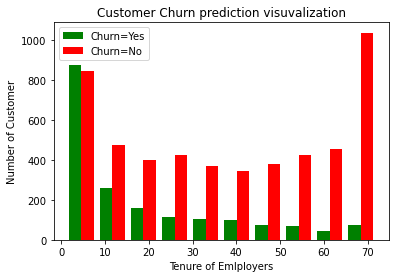

In [14]:
#now we are doing visuvalization for seeing that how many of loyal customer are leaving
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.xlabel('Tenure of Emlployers')
plt.ylabel("Number of Customer")
plt.title("Customer Churn prediction visuvalization")
plt.legend()


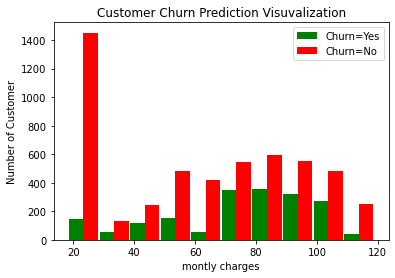

In [15]:
#now we are doing visuvalization of churn vs mothlycharges
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('montly charges')
plt.ylabel('Number of Customer')
plt.title("Customer Churn Prediction Visuvalization")

plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
#now  we are seeing the unique value so, we can use label encoding
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [17]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype == 'object':#we need column that is categorical for the labelencoding
            print(f'{column} : {df[column].unique()}')

In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
#so, we can see that in column like OnlineBackup where NO internet service so, it is like no only
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)

C:\Users\ronak\AppData\Local\Temp\ipykernel_4312\1182224390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace=True)
C:\Users\ronak\AppData\Local\Temp\ipykernel_4312\1182224390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace=True)


In [20]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineBackup','OnlineSecurity',
               'DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling','Churn','StreamingTV'
               ]
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\ronak\AppData\Local\Temp\ipykernel_4312\2617416274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [22]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [23]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\ronak\AppData\Local\Temp\ipykernel_4312\698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [24]:
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])


In [25]:
df2.sample(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4306,0,0,1,1,40,1,1,1,1,0,...,0,1,0,1,0,0,0,1,0,0
3748,0,0,0,0,48,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
4432,0,0,0,0,37,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
6280,1,0,0,1,23,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5490,0,0,0,0,6,1,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0


In [26]:
 df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [27]:
#now we are scaling the data
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
    

In [28]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [29]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

### Splitting the data into train and test case

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
X_train.shape

(5625, 26)

In [32]:
X_test.shape

(1407, 26)

In [33]:
X_train[:2]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,1,0,0,0,0.591549,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3410,0,0,0,0,0.028169,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [34]:
len(X_train.columns)

26

### Applying the ANN using tensorflow 

In [35]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics='Accuracy')
model.fit(X_train,y_train,epochs=100)


Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.5032 - Accuracy: 0.7522
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4313 - Accuracy: 0.7948
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4221 - Accuracy: 0.8020
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4180 - Accuracy: 0.8032
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4171 - Accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4146 - Accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4131 - Accuracy: 0.8039
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - Accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - Accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4102 - Accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3764 - Accuracy: 0.8256
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3760 - Accuracy: 0.8231
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3742 - Accuracy: 0.8252
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3739 - Accuracy: 0.8270
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3749 - Accuracy: 0.8258
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3736 - Accuracy: 0.8249
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3741 - Accuracy: 0.8265
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3737 - Accuracy: 0.8210
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3730 - Accuracy: 0.8265
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3735 - Accuracy: 

In [36]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4516 - Accuracy: 0.7804


[0.451606422662735, 0.7803837656974792]

In [37]:
yp=model.predict(X_test)
yp[:4]

44/44 [==============================] - 0s 2ms/step


array([[0.0175459 ],
       [0.152306  ],
       [0.87352496],
       [0.07447705]], dtype=float32)

In [38]:
y_test[:4]

2481    0
6784    0
6125    1
3052    0
Name: Churn, dtype: int64

In [39]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [40]:
y_pred[:4]

[0, 0, 1, 0]

### Classification Report

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



Text(69.0, 0.5, 'Truth')

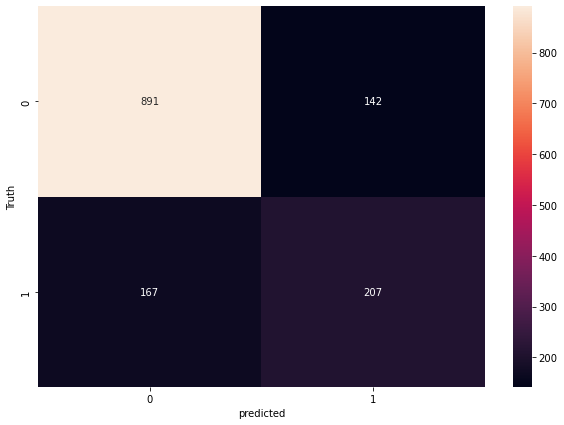

In [42]:
import seaborn as sn

cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

### Accuracy of model using manual calculation

In [43]:
#now we will find manual accuracy
#so,accuracy=Truth/total prediction so,trurh is diagonal of confusion matrix
accuracy=(901+195)/(901+179+198+132)
accuracy
#so its result are coming similar to f1 score

0.7773049645390071

### Precision calculation

In [44]:
#Precision for 0 class i.e Precision for customer who did not chutn
round(901/(901+179),2)
#precision=total truth of 0 class/total truth of 0 class or error predicted as 0

0.83

In [45]:
#Precison for 1 class i.e Precision for customer who actually churned
round(195/(195+132),2)
#so you can verify from above classification Report

0.6

### Recall for 0 class

In [46]:
#Recall is your total truth
#total correct prediction/total actual 0th sample 
round(901/(901+132),2)

0.87

### Recall for 1 class

In [47]:
round(195/(179+195),2)
#verified from the classification report

0.52